<a href="https://colab.research.google.com/github/retolador/machine_learning_retolador/blob/master/Predict_handwritted_numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predict handwritten numbers
1. create the model
2. Predict the handwritten numbers

In [2]:
%tensorflow_version 2.x

In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt
import numpy as np
import random

In [4]:
img_rows, img_cols = 28, 28

# The number of training samples per batch. 128 is a reasonable number.
batch_size = 128

# Our data set contains 10 digits, so the number of classes is 10
num_classes = 10

# epochs is the number of times the model is trained with the data set, more can be better, up to a point
epochs = 20

# dropout is a common regularization hyperperameter. It helps to avoid overfitting or memorizing the input.
dropout = 0.5

In [5]:
#Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Save original test images for display purposes
orig_test = x_test

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
#Preparation data
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(dropout/2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Epoch 1/20
469/469 [==============================] - 37s 9ms/step - loss: 0.4838 - accuracy: 0.8477 - val_loss: 0.0537 - val_accuracy: 0.9838
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0895 - accuracy: 0.9741 - val_loss: 0.0394 - val_accuracy: 0.9875
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0669 - accuracy: 0.9793 - val_loss: 0.0336 - val_accuracy: 0.9887
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0524 - accuracy: 0.9834 - val_loss: 0.0298 - val_accuracy: 0.9901
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0426 - accuracy: 0.9868 - val_loss: 0.0282 - val_accuracy: 0.9912
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0359 - accuracy: 0.9880 - val_loss: 0.0273 - val_accuracy: 0.9913
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0311 - accuracy: 0.9900 - val_loss: 0.0286 - val_accuracy: 0.9916
Epoch

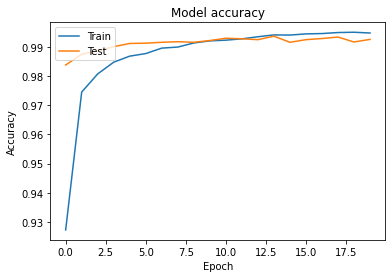

In [8]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train model for a given number of epochs
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

# Evaluate model against test data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [9]:
from skimage import io, transform

Original image shape (141, 163, 4)


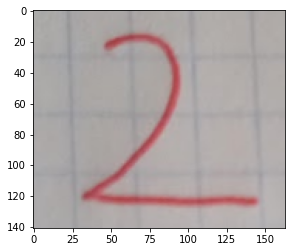

In [56]:
rgb = io.imread('numero2.png')
print(f'Original image shape {rgb.shape}')
plt.imshow(rgb)

Grayscale image shape (141, 163)


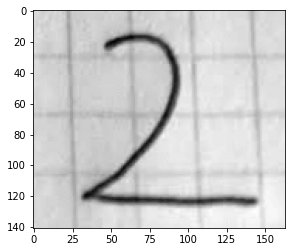

In [13]:
gray = np.dot(rgb[...,:], [0.299, 0.587, 0.114, 0])
print(f'Grayscale image shape {gray.shape}')
plt.imshow(gray, cmap='gray')

Resized image shape (28, 28)


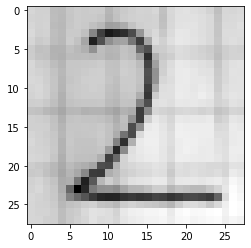

In [14]:
gray28x28 = transform.resize(gray, (img_rows, img_cols))
print(f'Resized image shape {gray28x28.shape}')
plt.imshow(gray28x28, cmap='gray')

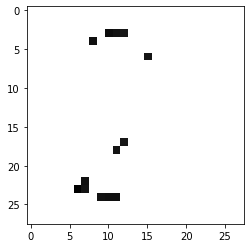

In [15]:
vectorized_filter = np.vectorize(lambda v: 255 if v > 128 else v)
filtered = vectorized_filter(gray28x28)
plt.imshow(filtered, cmap='gray')

This plot maybe affected the lines in the background

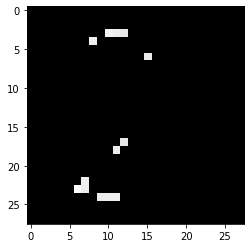

In [16]:
inverted = 255 - filtered
reshaped = inverted.reshape(img_rows, img_cols, 1) / 255.0
batch = np.array([reshaped])
plt.imshow(inverted, cmap='gray')


In [17]:
predictions = model.predict(batch)
most_likely = predictions.argmax(1)
most_likely

array([3])

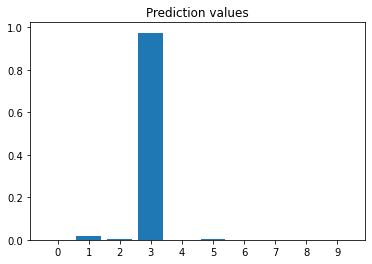

In [18]:
plt.bar(range(10), predictions[0], tick_label=range(10))
plt.title('Prediction values')
plt.show()

In [35]:
def predict_digit(number):
    number_read = io.imread(number)
    gray = np.dot(number_read[...,:], [0.299, 0.587, 0.114, 0]) # to gray scale
    gray28x28 = transform.resize(gray, (img_rows, img_cols))
    vectorized_filter = np.vectorize(lambda v: 255 if v > 128 else v)
    filtered = vectorized_filter(gray28x28)
    inverted = 255 - filtered
    reshaped = inverted.reshape(img_rows, img_cols, 1) / 255.0
    batch = np.array([reshaped])
    predictions = model.predict(batch)
    most_likely = predictions.argmax(1)

    return most_likely, predictions

Predict the numbers written by red in a notebook with lines

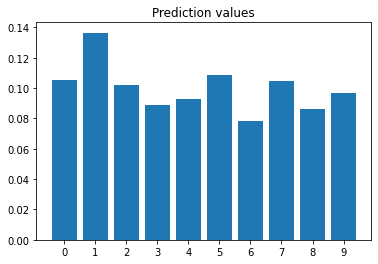

In [36]:
a,b =  predict_digit("numero0.png")
plt.bar(range(10), b[0], tick_label=range(10))
plt.title('Prediction values')
plt.show()

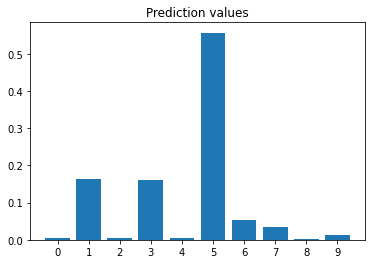

In [37]:
a,b =  predict_digit("numero1.png")
plt.bar(range(10), b[0], tick_label=range(10))
plt.title('Prediction values')
plt.show()

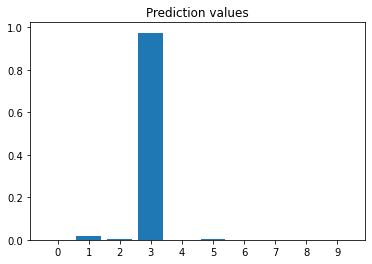

In [38]:
a,b =  predict_digit("numero2.png")
plt.bar(range(10), b[0], tick_label=range(10))
plt.title('Prediction values')
plt.show()

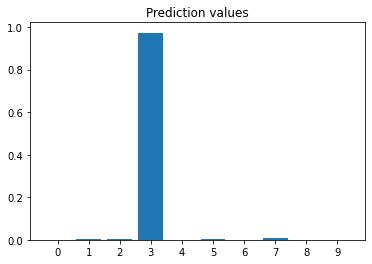

In [39]:
a,b =  predict_digit("numero3.png")
plt.bar(range(10), b[0], tick_label=range(10))
plt.title('Prediction values')
plt.show()

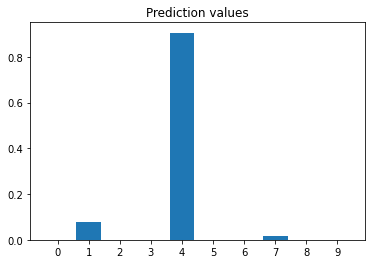

In [40]:
a,b =  predict_digit("numero4.png")
plt.bar(range(10), b[0], tick_label=range(10))
plt.title('Prediction values')
plt.show()

The results aren't good because the lines make the prediction difficult and the model have to train for this cases.
Now I try numbers painted in brown in a white paper

Original image shape (181, 186, 4)


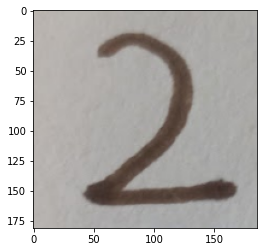

In [57]:
rgb = io.imread('numero2_ve2.png')
print(f'Original image shape {rgb.shape}')
plt.imshow(rgb)

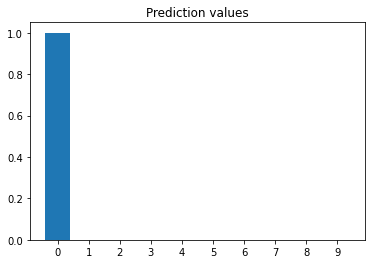

In [46]:
a,b =  predict_digit("numero0_ve2.png")
plt.bar(range(10), b[0], tick_label=range(10))
plt.title('Prediction values')
plt.show()

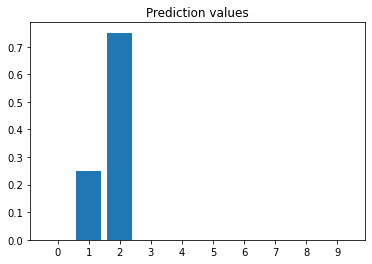

In [47]:
a,b =  predict_digit("numero1_ve2.png")
plt.bar(range(10), b[0], tick_label=range(10))
plt.title('Prediction values')
plt.show()

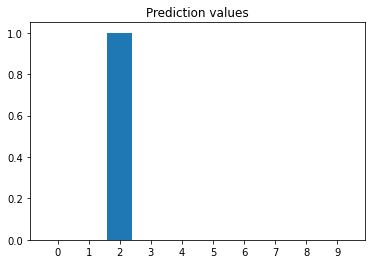

In [48]:
a,b =  predict_digit("numero2_ve2.png")
plt.bar(range(10), b[0], tick_label=range(10))
plt.title('Prediction values')
plt.show()

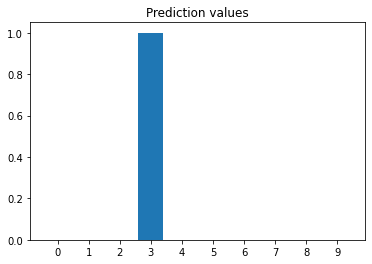

In [49]:
a,b =  predict_digit("numero3_ve2.png")
plt.bar(range(10), b[0], tick_label=range(10))
plt.title('Prediction values')
plt.show()

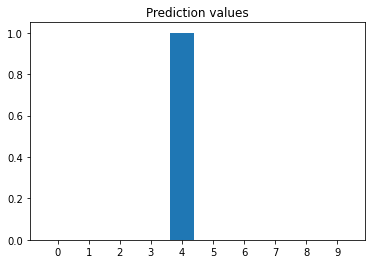

In [50]:
a,b =  predict_digit("numero4_ve2.png")
plt.bar(range(10), b[0], tick_label=range(10))
plt.title('Prediction values')
plt.show()

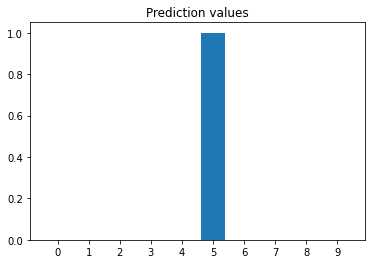

In [51]:
a,b =  predict_digit("numero5_ve2.png")
plt.bar(range(10), b[0], tick_label=range(10))
plt.title('Prediction values')
plt.show()

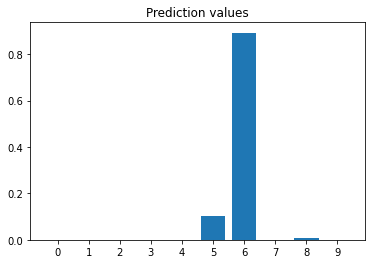

In [52]:
a,b =  predict_digit("numero6_ve2.png")
plt.bar(range(10), b[0], tick_label=range(10))
plt.title('Prediction values')
plt.show()

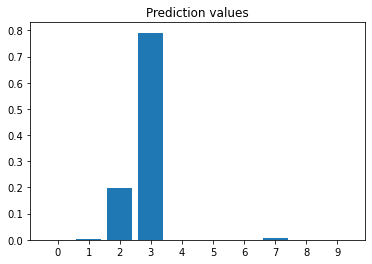

In [53]:
a,b =  predict_digit("numero7_ve2.png")
plt.bar(range(10), b[0], tick_label=range(10))
plt.title('Prediction values')
plt.show()

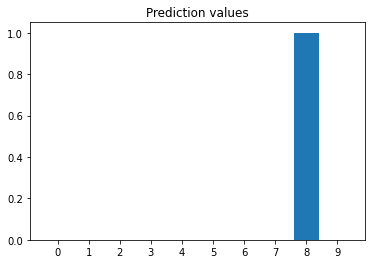

In [54]:
a,b =  predict_digit("numero8_ve2.png")
plt.bar(range(10), b[0], tick_label=range(10))
plt.title('Prediction values')
plt.show()

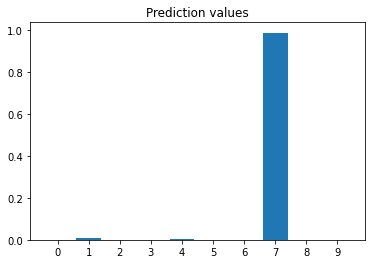

In [55]:
a,b =  predict_digit("numero9_ve2.png")
plt.bar(range(10), b[0], tick_label=range(10))
plt.title('Prediction values')
plt.show()

Now the results are better, in this case we have to say that the data needs to be in white paper to get the results in this model.
